# FLIGHT PRICE PREDICTION PROJECT

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

Read the Datasets

In [2]:
df=pd.read_csv(r'C:/Users/user/Desktop/FRTech Internship Project/FLIGHT PRICE CASE STUDY/flight price prediction.csv')
df.head()

,Unnamed: 0,Airline Company,Flight Code,Departure Time,Source City,Arrival Time,Destination City,Duration,Total Stops,Price
0,0,Air India,-6238/5371,08:30,New Delhi,14:45,Mumbai,6h 15m,1 Stop,"29,255"
1,1,Air India,-6238/5371,08:30,New Delhi,14:45,Mumbai,6h 15m,1 Stop,"29,255"
2,2,Air India,-6238/5371,08:30,New Delhi,14:45,Mumbai,6h 15m,1 Stop,"29,255"
3,3,Air India,-6238/5371,08:30,New Delhi,14:45,Mumbai,6h 15m,1 Stop,"29,255"
4,4,Air India,-6238/5371,08:30,New Delhi,14:45,Mumbai,6h 15m,1 Stop,"29,255"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        144 non-null    int64 
 1   Airline Company   144 non-null    object
 2   Flight Code       144 non-null    object
 3   Departure Time    144 non-null    object
 4   Source City       144 non-null    object
 5   Arrival Time      144 non-null    object
 6   Destination City  144 non-null    object
 7   Duration          144 non-null    object
 8   Total Stops       144 non-null    object
 9   Price             144 non-null    object
dtypes: int64(1), object(9)
memory usage: 11.4+ KB


In [4]:
df.describe()

,Unnamed: 0
count,144.000000
mean,71.500000
std,41.713307
min,0.000000
25%,35.750000
50%,71.500000
75%,107.250000
max,143.000000


In [5]:
df=df.drop('Unnamed: 0', axis=1)

In [6]:
df.shape

(144, 9)

In [7]:
df.dtypes

Airline Company     object
Flight Code         object
Departure Time      object
Source City         object
Arrival Time        object
Destination City    object
Duration            object
Total Stops         object
Price               object
dtype: object

DATA CLEANING

In [8]:
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing.head()

,Total,Percent
Airline Company,0,0.0
Flight Code,0,0.0
Departure Time,0,0.0
Source City,0,0.0
Arrival Time,0,0.0


In [9]:
type(df)

pandas.core.frame.DataFrame

EXPLORATORY  DATA   ANALYSIS

In [10]:
df.isnull().sum()

Airline Company     0
Flight Code         0
Departure Time      0
Source City         0
Arrival Time        0
Destination City    0
Duration            0
Total Stops         0
Price               0
dtype: int64

In [11]:
df1=df.groupby(['Flight Code' , 'Airline Company'], as_index=False).count()

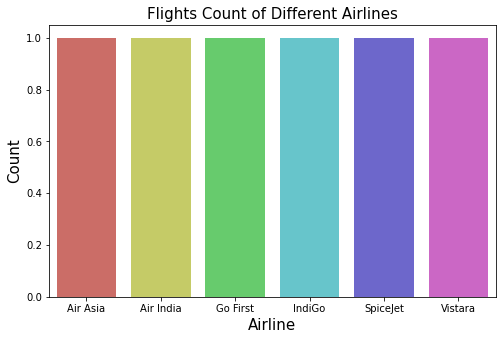

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df1['Airline Company'], palette='hls')
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [13]:
df2=df.groupby(['Flight Code' , 'Airline Company' , 'Total Stops'], as_index=False).count()

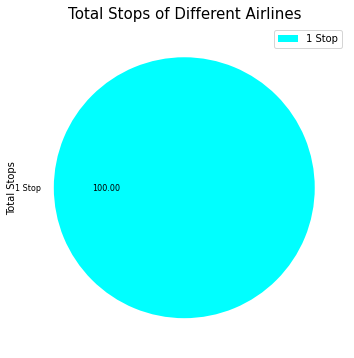

In [14]:
plt.figure(figsize=(8,6))
df2['Total Stops'].value_counts().plot(kind='pie',textprops={'color':'black'}, autopct='%.2f',cmap='cool',fontsize=8)
plt.title('Total Stops of Different Airlines', fontsize=15)
plt.legend(['1 Stop' , 'Non-Stop'])
plt.show()

In [15]:
df['Price'].value_counts()

29,255    144
Name: Price, dtype: int64

In [16]:
df['Airline Company'].value_counts()

IndiGo       45
Vistara      33
Air India    32
Go First     17
SpiceJet      9
Air Asia      8
Name: Airline Company, dtype: int64

<AxesSubplot:title={'center':'Price'}>

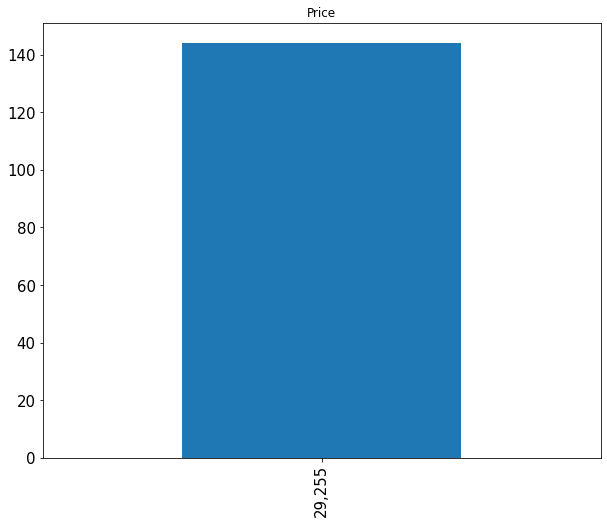

In [17]:
plt.subplot()
df['Price'].value_counts().plot(kind='bar',title='Price',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Airlines'}>

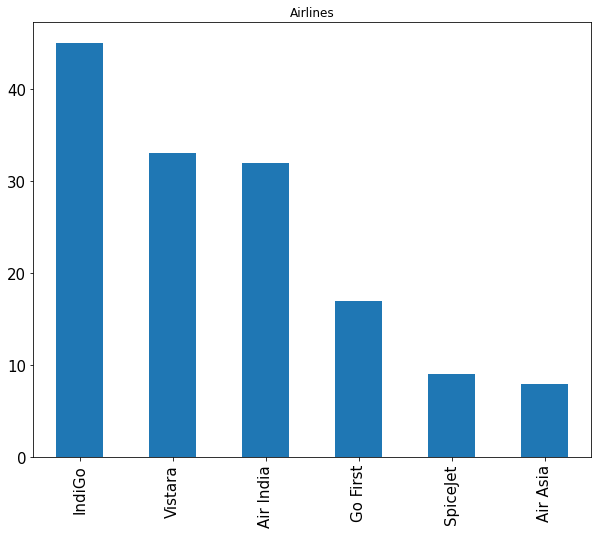

In [18]:
plt.subplot()
df['Airline Company'].value_counts().plot(kind='bar',title='Airlines',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Flight'}>

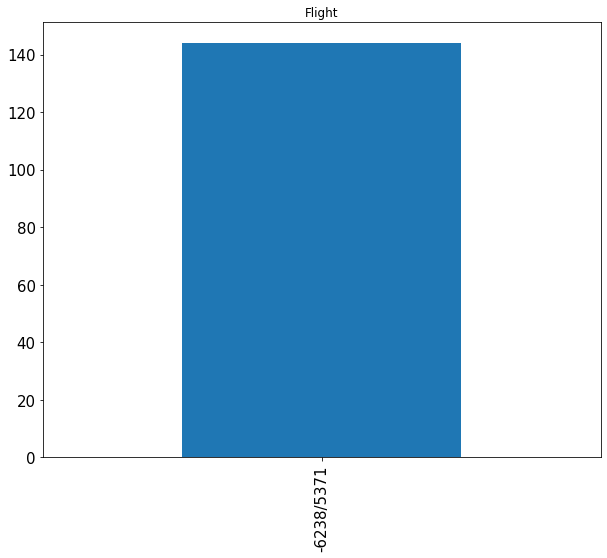

In [19]:
plt.subplot()
df['Flight Code'].value_counts().plot(kind='bar',title='Flight',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Source City'}>

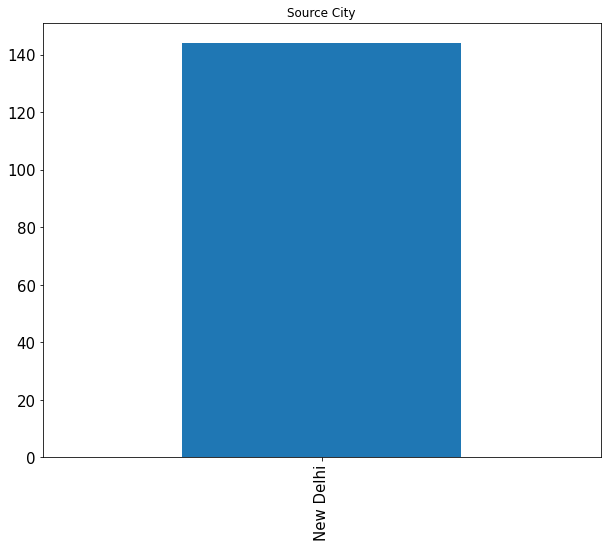

In [20]:
plt.subplot()
df['Source City'].value_counts().plot(kind='bar',title='Source City',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Destination'}>

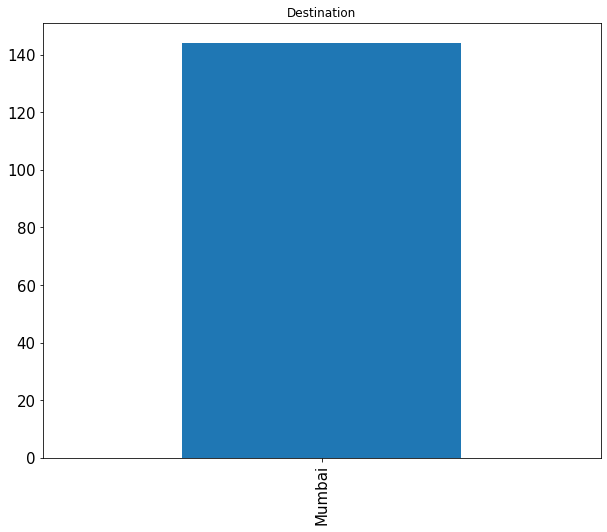

In [21]:
plt.subplot()
df['Destination City'].value_counts().plot(kind='bar',title='Destination',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Duration'}>

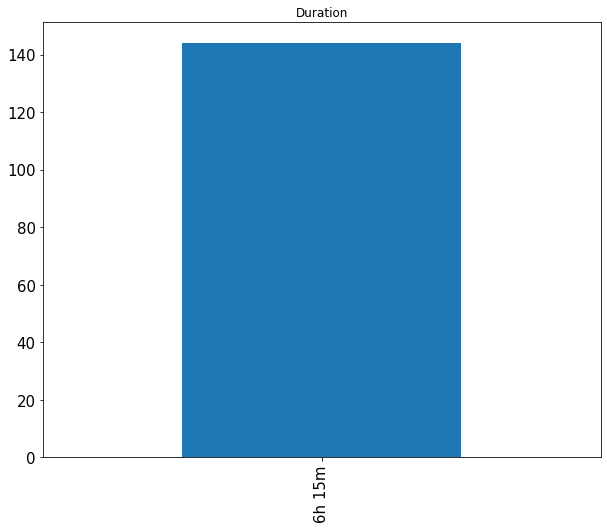

In [22]:
plt.subplot()
df['Duration'].value_counts().plot(kind='bar',title='Duration',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Total Stops'}>

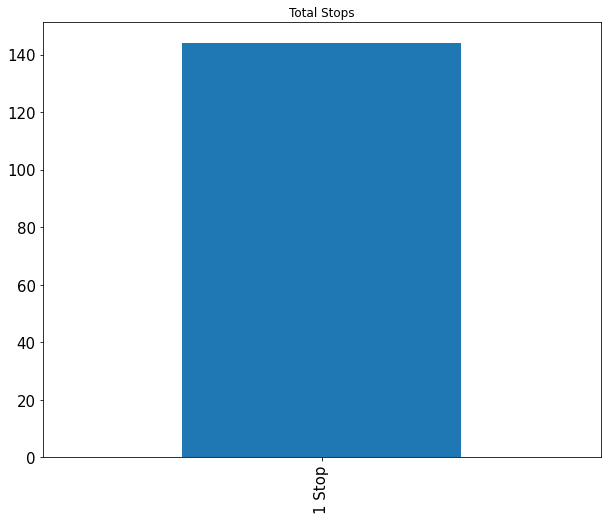

In [23]:
plt.subplot()
df['Total Stops'].value_counts().plot(kind='bar',title='Total Stops',figsize=(10,8),fontsize=15)

Empty DataFrame
Columns: []
Index: []


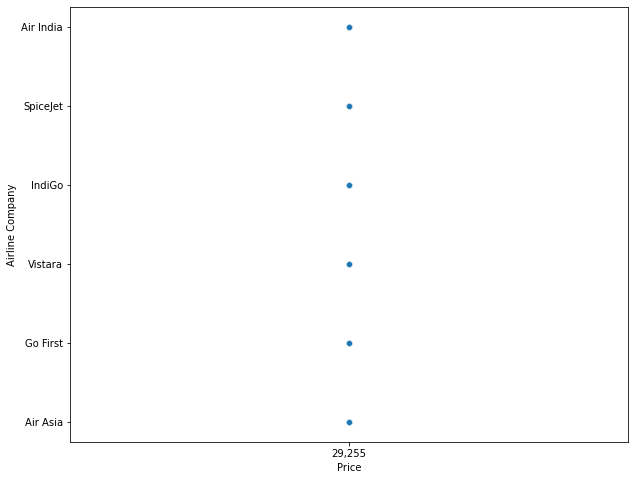

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Price'],df['Airline Company'])
print(df[['Price' , 'Airline Company']].corr())
plt.show()

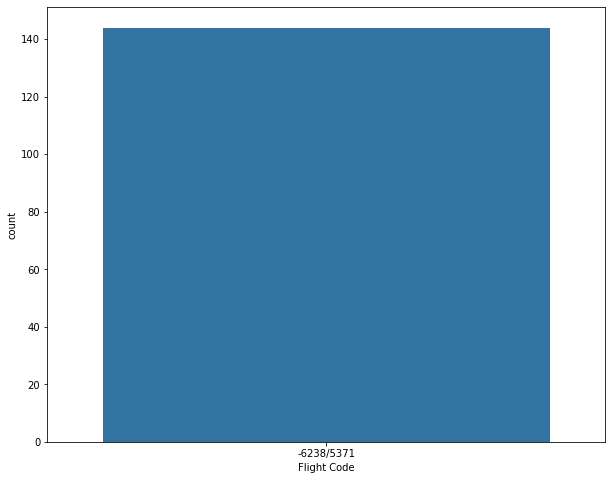

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['Flight Code'])
plt.show()

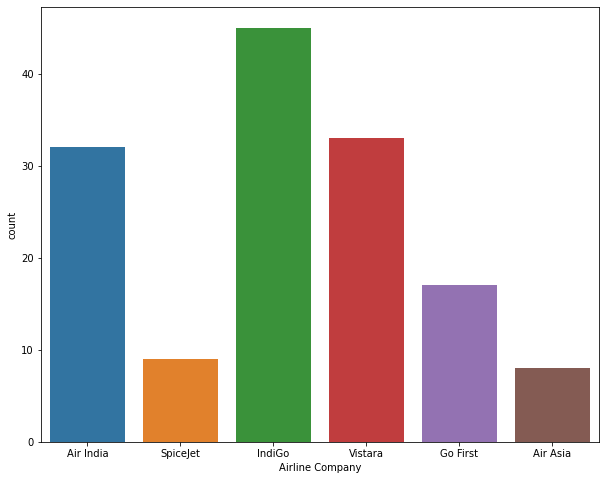

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df['Airline Company'])
plt.show()

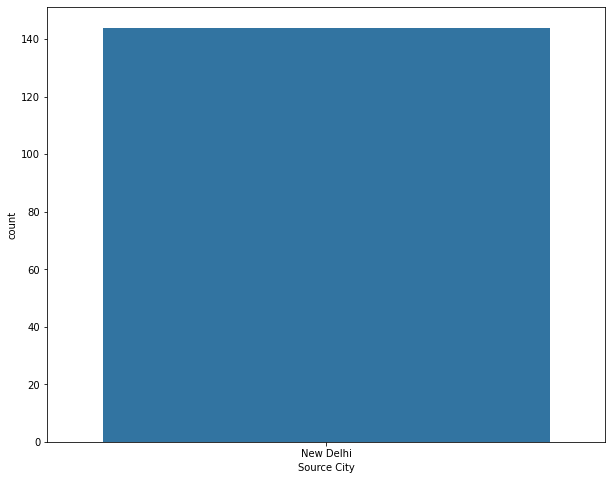

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(df['Source City'])
plt.show()

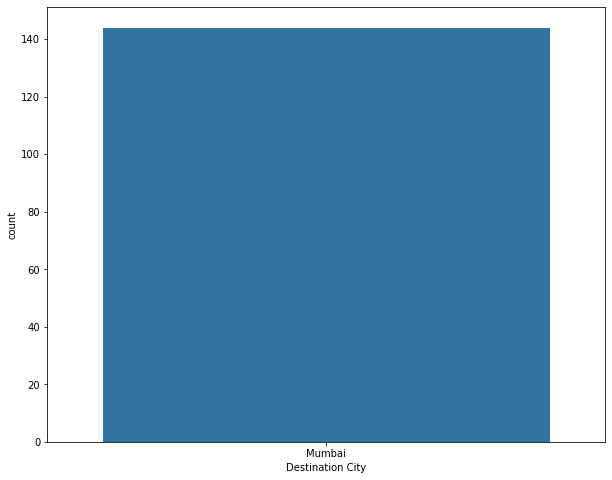

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(df['Destination City'])
plt.show()

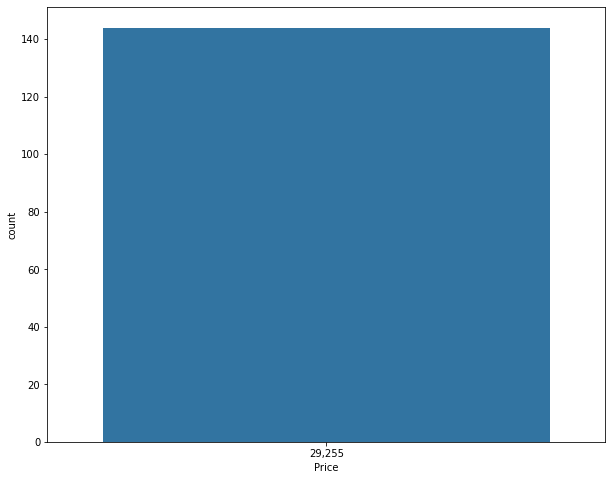

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(df['Price'])
plt.show()

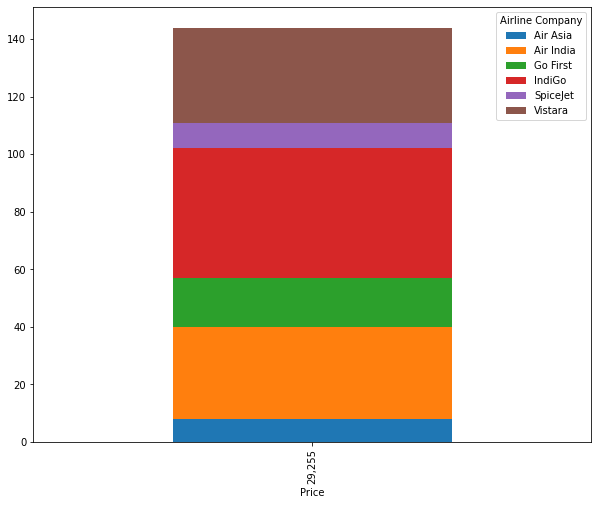

In [30]:
data=pd.crosstab(df['Price'],df['Airline Company'])
data.plot.bar(stacked=True,figsize=(10,8))
plt.xticks()
plt.show()

<AxesSubplot:xlabel='Airline Company', ylabel='Price'>

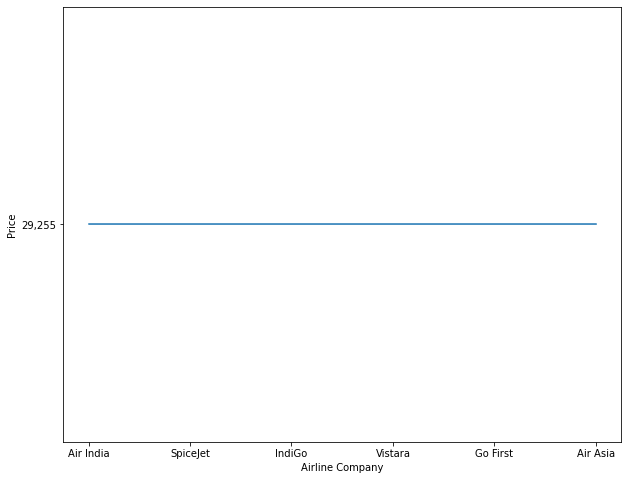

In [31]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Airline Company',y='Price',data=df)

<AxesSubplot:xlabel='Source City', ylabel='Price'>

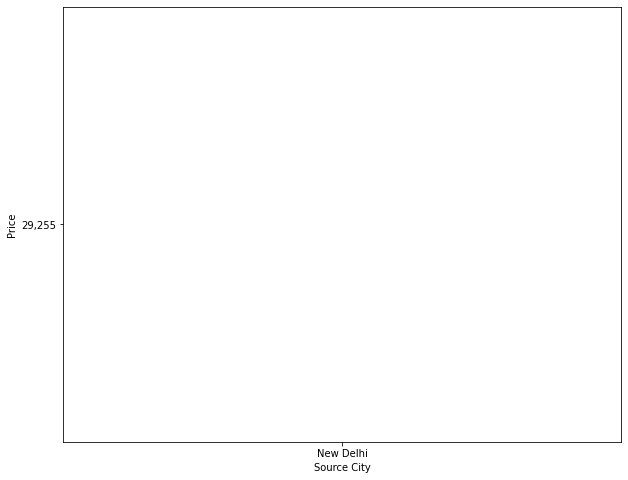

In [32]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Source City',y='Price',data=df)

<AxesSubplot:xlabel='Destination City', ylabel='Price'>

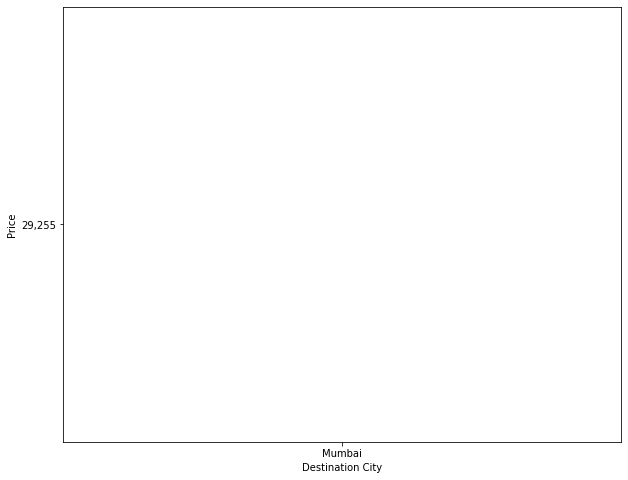

In [33]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Destination City',y='Price',data=df)

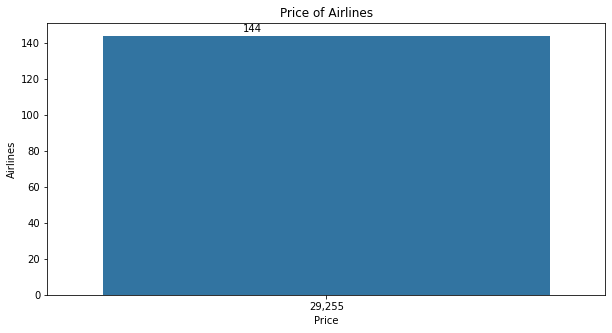

In [34]:
plt.figure(figsize=(10,5))
plt.title('Price of Airlines')
ax=sns.countplot(x='Price',data=df)
plt.xlabel('Price')
plt.ylabel('Airlines')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25,i.get_height()+1), va='bottom',color='black')

<Figure size 720x576 with 0 Axes>

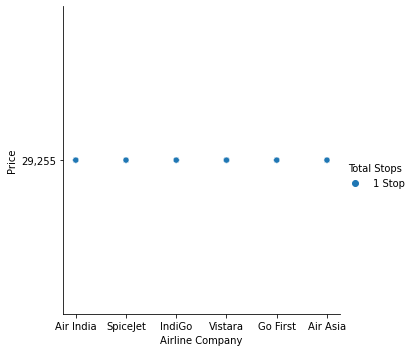

In [35]:
plt.figure(figsize=(10,8))
sns.relplot(x='Airline Company',y='Price', hue='Total Stops',data=df)
plt.xticks();

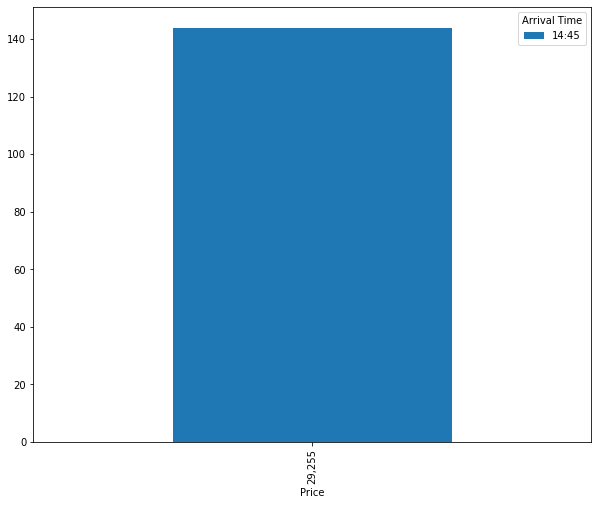

In [36]:
data=pd.crosstab(df['Price'],df['Arrival Time'])
data.plot.bar(stacked=True,figsize=(10,8))
plt.xticks()
plt.show()

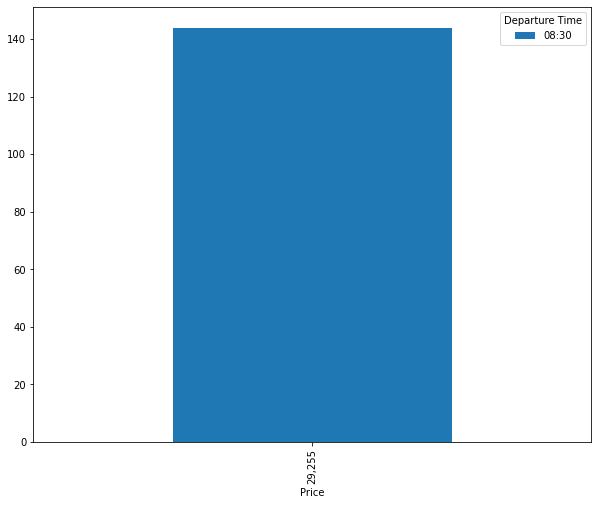

In [37]:
data=pd.crosstab(df['Price'],df['Departure Time'])
data.plot.bar(stacked=True,figsize=(10,8))
plt.xticks()
plt.show()

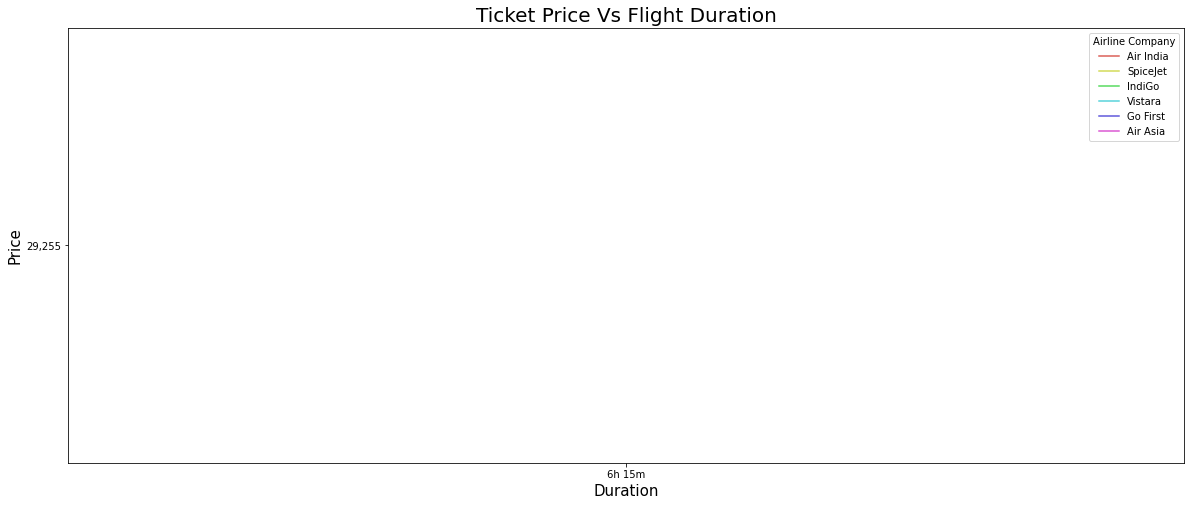

In [38]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration',y='Price',hue='Airline Company',palette='hls')
plt.title('Ticket Price Vs Flight Duration',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

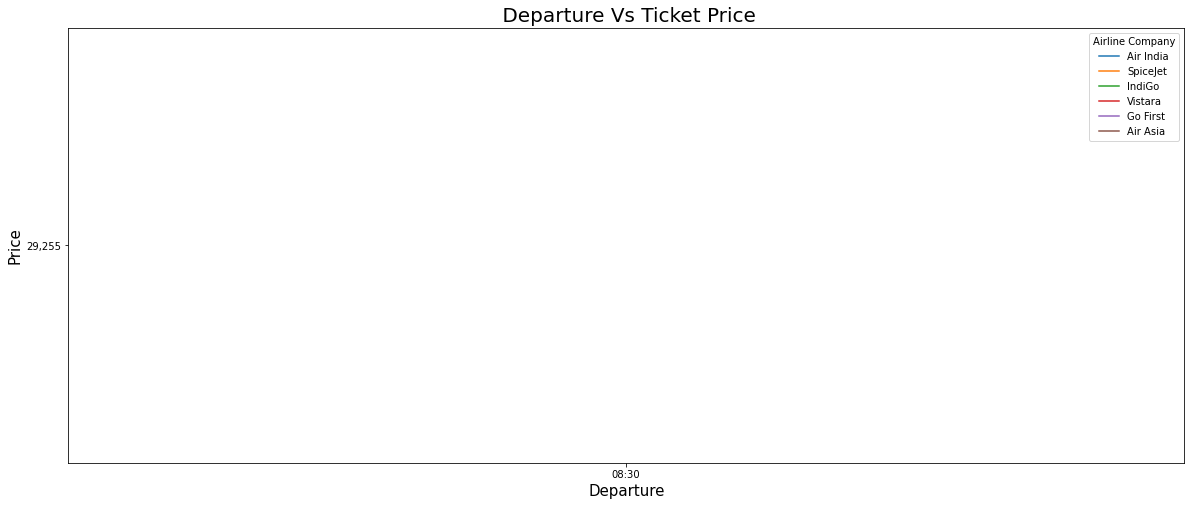

In [39]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Departure Time',y='Price',color='blue',hue='Airline Company')
plt.title(' Departure Vs Ticket Price',fontsize=20)
plt.xlabel('Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [40]:
df.groupby(['Flight Code','Source City','Destination City', 'Airline Company'],as_index=False).count().groupby(['Source City','Destination City'],as_index=False)['Flight Code'].count().head(10)

,Source City,Destination City,Flight Code
0,New Delhi,Mumbai,6


In [41]:
df.groupby(['Airline Company','Source City','Destination City'], as_index=False)['Price'].mean().head(10)

,Airline Company,Source City,Destination City
0,Air Asia,New Delhi,Mumbai
1,Air India,New Delhi,Mumbai
2,Go First,New Delhi,Mumbai
3,IndiGo,New Delhi,Mumbai
4,SpiceJet,New Delhi,Mumbai
5,Vistara,New Delhi,Mumbai


In [42]:
df.groupby(['Airline Company','Source City','Destination City'], as_index=False)['Price'].count().head(10)

,Airline Company,Source City,Destination City,Price
0,Air Asia,New Delhi,Mumbai,8
1,Air India,New Delhi,Mumbai,32
2,Go First,New Delhi,Mumbai,17
3,IndiGo,New Delhi,Mumbai,45
4,SpiceJet,New Delhi,Mumbai,9
5,Vistara,New Delhi,Mumbai,33


In [43]:
# categorical value
c=(df.dtypes=="object")
object_cols=list(c[c].index)
print("categorical values: ")
print(object_cols)

categorical values: 
['Airline Company', 'Flight Code', 'Departure Time', 'Source City', 'Arrival Time', 'Destination City', 'Duration', 'Total Stops', 'Price']


In [44]:
for i in object_cols:
    print(i, df[i].isnull().sum())

Airline Company 0
Flight Code 0
Departure Time 0
Source City 0
Arrival Time 0
Destination City 0
Duration 0
Total Stops 0
Price 0


In [45]:
for i in object_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [46]:
#numerical value
n=(df.dtypes == "float64")
num_cols=list(n[n].index)
print("Numeric values: ")
print(num_cols)

Numeric values: 
[]


In [47]:
for i in num_cols:
    print(i, df[i].isnull().sum())

In [48]:
for i in num_cols:
    df[i].fillna(df[i].median(),inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline Company   144 non-null    object
 1   Flight Code       144 non-null    object
 2   Departure Time    144 non-null    object
 3   Source City       144 non-null    object
 4   Arrival Time      144 non-null    object
 5   Destination City  144 non-null    object
 6   Duration          144 non-null    object
 7   Total Stops       144 non-null    object
 8   Price             144 non-null    object
dtypes: object(9)
memory usage: 10.2+ KB


In [50]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = le.fit_transform(df[col])

In [51]:
# storing the Dependent Variables in X and Independent Variable in Y

x=df.drop(['Price'],axis=1)
y=df['Price']

In [52]:
# splitting the data into Training set and Testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((100, 8), (44, 8), (100,), (44,))

DATA PRE-PROCESSING

In [53]:
from sklearn import preprocessing
features=df.drop(['Duration','Price','Total Stops'],axis=1)
target=df['Price']
col_names=list(features.columns)
scaler=preprocessing.StandardScaler()
features=scaler.fit_transform(features)
features=pd.DataFrame(features,columns=col_names)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline Company,144.0,7.999003e-17,1.00349,-1.78619,-1.146361,0.133298,0.773127,1.412957
Flight Code,144.0,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
Departure Time,144.0,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
Source City,144.0,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
Arrival Time,144.0,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
Destination City,144.0,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


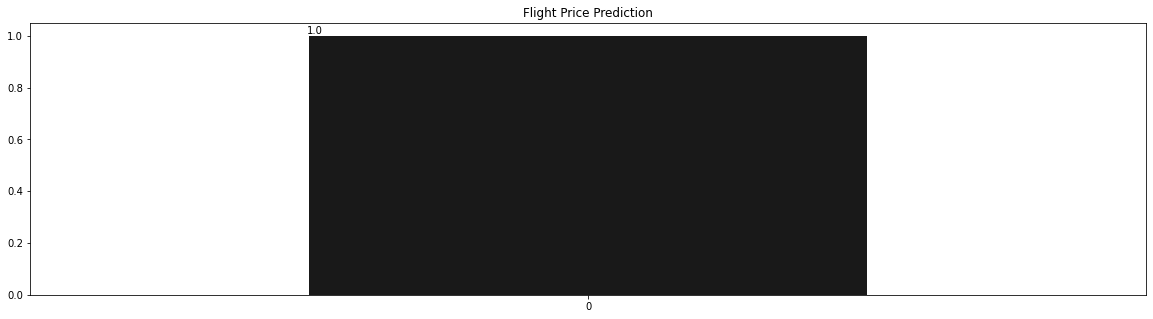

In [54]:
plt.figure(figsize=(20,5))
ax=df.Price.value_counts(normalize=True).plot(kind='bar', color=['black', 'pink'], alpha=0.9, rot=0)
plt.title('Flight Price Prediction')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x() * 1.01, i.get_height() * 1.01))
    
plt.show()  

<AxesSubplot:>

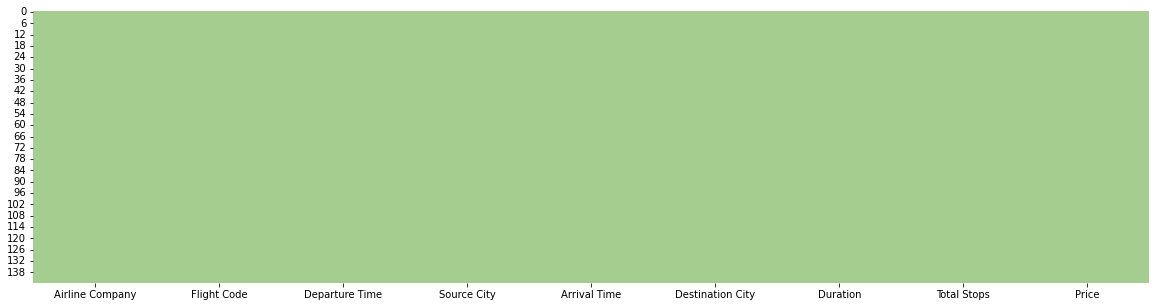

In [55]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False,cmap='crest')

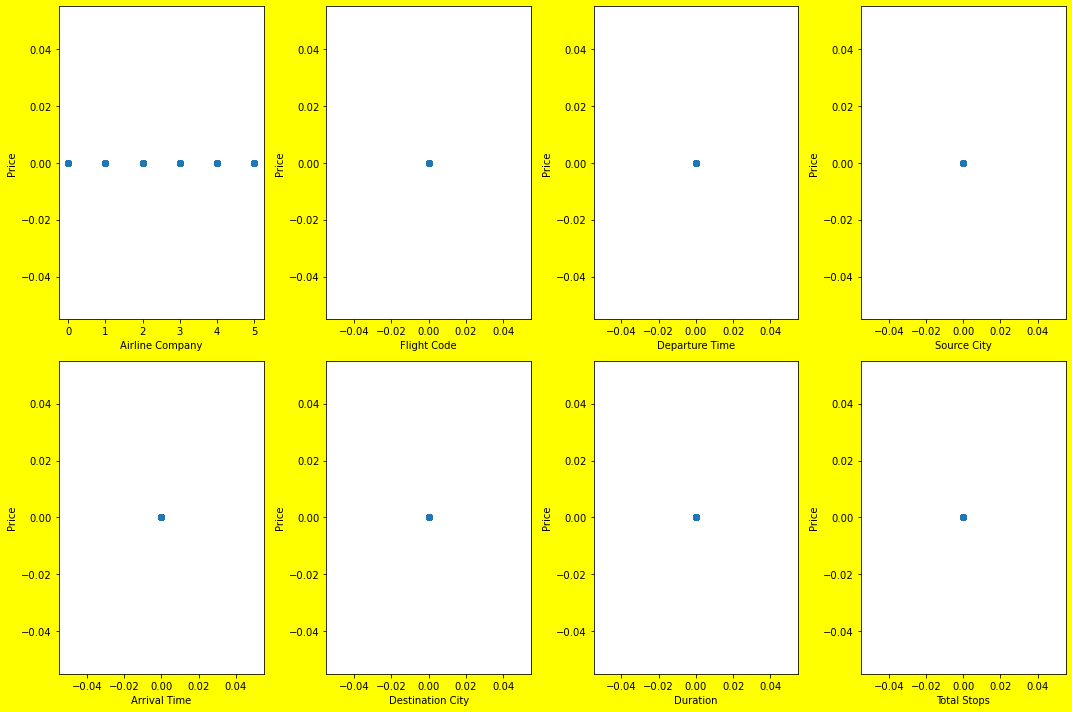

In [56]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor= 'yellow')
plotnumber  =  1

for column in x:
    if plotnumber<=8  :
        ax  =  plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Price',fontsize=10)
    plotnumber+=1
plt.tight_layout()      

In [57]:
# Scaling the values to convert the int values to Machine Langugaes
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [58]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
outcome=pd.DataFrame(a)
outcome.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


MODEL  BUILDING

In [59]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
# Models:

lg = LinearRegression()
dcr = DecisionTreeRegressor()
bag = BaggingRegressor()
rfr = RandomForestRegressor()
SVR = SVR()
XGB = xgb.XGBRegressor()
KNN = KNeighborsRegressor(n_neighbors=5)
ETR = ExtraTreesRegressor()
RE=Ridge()
LO=linear_model.Lasso(alpha=0.1)

GBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [lg, dcr, rfr, KNN, ETR, GBR, XGB, bag,RE,LO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = outcome.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R2_score: 1.0
Root Mean Squared Log Error (RMSLE): -inf
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  1.0
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R2_score: 1.0
Root Mean Squared Log Error (RMSLE): -inf
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  1.0
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R2_score: 1.0
Root Mean Squared Log Error (RMSLE): -inf
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  1.0
-------------------------

In [60]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,Lasso(alpha=0.1),0.0,1.0,0.0,NaN,0.0,-inf,1.0


In [61]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression,1.0,0.0,0.0,NaN,0.0,-inf,1.0
1,DecisionTreeRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomForestRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KNeighborsRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ExtraTreesRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GradientBoostingRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,XGBRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BaggingRegressor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ridge Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Lasso Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
from sklearn.preprocessing import StandardScaler
# Data Scaling Formula Z=(x-mean)/std
scaler = StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[-1.14636101,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.14636101,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.14636101,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.13329779,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77312719,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13329779,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [64]:
# Adjusted R2 score
regression.score(x_train,y_train)

1.0

In [65]:
regression.score(x_test,y_test)

1.0

In [66]:
y_pred = regression.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

BIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

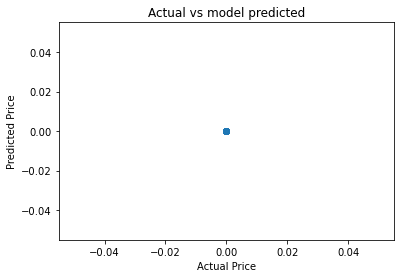

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs model predicted')
plt.show

MODEL EVALUATION

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred=regression.predict(x_test)

In [69]:
mean_absolute_error(y_test,y_pred)

0.0

In [70]:
mean_squared_error(y_test,y_pred)

0.0

In [71]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0

In [72]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
# LassoCV will return bestalpha after max iteration
#Normalize is subtracting the mean and dividing by the L2-norm

lassoregularization=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

lasscv=GridSearchCV(lassoregularization,parameters,scoring='neg_mean_squared_error', n_jobs=-1,cv=5)


lasscv  =  LassoCV(alphas  =  None, max_iter  =  100, normalize  =  True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [73]:
#best alpha parameter
alpha  =  lasscv.alpha_
alpha

1e-15

In [74]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before

lasso_reg  =  Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1e-15)

In [75]:
lasso_reg.score(x_test,y_test)

1.0

In [76]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

ridge_regressor=Ridge()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [77]:
df.head(2)

,Airline Company,Flight Code,Departure Time,Source City,Arrival Time,Destination City,Duration,Total Stops,Price
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


SELECTING THE BEST MODEL

In [78]:
# Training the model with Linear regression
lg.fit(x_train, y_train)

# Predict the model with test data
y_pred=lg.predict(x_test)

In [79]:
#Creating a BackUp File
df_bk=df.copy()

In [80]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [81]:
result.sample(10)

,Airline Company,Flight Code,Departure Time,Source City,Arrival Time,Destination City,Duration,Total Stops,Price,Price_actual,Price_pred
9,4,0,0,0,0,0,0,0,0,0,0.0
119,2,0,0,0,0,0,0,0,0,0,0.0
100,1,0,0,0,0,0,0,0,0,0,0.0
133,3,0,0,0,0,0,0,0,0,0,0.0
132,3,0,0,0,0,0,0,0,0,0,0.0
84,3,0,0,0,0,0,0,0,0,0,0.0
111,3,0,0,0,0,0,0,0,0,0,0.0
117,3,0,0,0,0,0,0,0,0,0,0.0
78,1,0,0,0,0,0,0,0,0,0,0.0
73,1,0,0,0,0,0,0,0,0,0,0.0


In [82]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_param = {
      'max_depth' : range(4,8),
      'min_sample_split' : range(2,8,2),
      'learning_rate' : np.arange(0.1,0.3)
}

In [83]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
#y_pred=randomforest.predict(x_test)
score_randomforest = randomforest.score(x_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  1.0


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
#y_pred=knn.predict(x_test)
score_knn=knn.score(x_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 1.0


# 

# THANK YOU